In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [48]:
df_data= pd.read_csv('kidney_disease.csv')

In [49]:
df_data.shape

(400, 26)

In [50]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [51]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [52]:
df_data.drop('id',axis=1,inplace=True)

In [53]:
df_data.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [54]:
df_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [55]:
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df_data.rename(columns=col, inplace=True)


In [56]:
df_data.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [57]:
text_colmns=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for i in text_colmns:
    print(f"{i}:{df_data[i].dtype}")

packed_cell_volume:object
white_blood_cell_count:object
red_blood_cell_count:object


In [58]:
def convert_numeric(df_data,coloumn):
    df_data[coloumn]=pd.to_numeric(df_data[coloumn],errors='coerce')
for column in text_colmns:
    convert_numeric(df_data,column)
    
for column in text_colmns:
    convert_numeric(df_data,column)
    print(f"{i}:{df_data[i].dtype}")

red_blood_cell_count:float64
red_blood_cell_count:float64
red_blood_cell_count:float64


In [59]:
missing =df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)

red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cell                   65
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
bacteria                    4
pus_cell_clumps             4
hypertension                2
diabetes_mellitus           2
dtype: int64

In [60]:
def mean_values_insert(df_data, column):
    mean_values = df_data[column].mean()
    df_data[column]=df_data[column].fillna(mean_values)

def mode_values_insert(df_data, column):
    mode_values = df_data[column].mode()[0]
    df_data[column]=df_data[column].fillna(mode_values)

In [61]:
num_cols = [col for col in df_data.columns if df_data[col].dtype != 'object']
for col_name in num_cols:
    mean_values_insert(df_data, col_name)

obj_cols = [col for col in df_data.columns if df_data[col].dtype == 'object']
for col_name in obj_cols:
    mode_values_insert(df_data, col_name)


In [62]:
missing =df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)

Series([], dtype: int64)

In [63]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [64]:
print(f"diabetes_mellitus :{df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :{df_data['coronary_artery_disease'].unique()}")
print(f"class :{df_data['class'].unique()}")

diabetes_mellitus :['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease :['no' 'yes' '\tno']
class :['ckd' 'ckd\t' 'notckd']


In [65]:
df_data['diabetes_mellitus']=df_data['diabetes_mellitus'].replace(to_replace={" yes":"yes","\tyes":"yes","\tno":"no"})
df_data['coronary_artery_disease']=df_data['coronary_artery_disease'].replace(to_replace={"\tno":"no"})
df_data['class']=df_data['class'].replace(to_replace={"ckd\t":"ckd","notckd":"not ckd"})

In [66]:
print(f"diabetes_mellitus :{df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :{df_data['coronary_artery_disease'].unique()}")
print(f"class :{df_data['class'].unique()}")

diabetes_mellitus :['yes' 'no']
coronary_artery_disease :['no' 'yes']
class :['ckd' 'not ckd']


In [67]:
for col in obj_cols:
    print(f"{col} has {df_data[col].unique()}")


red_blood_cells has ['normal' 'abnormal']
pus_cell has ['normal' 'abnormal']
pus_cell_clumps has ['notpresent' 'present']
bacteria has ['notpresent' 'present']
hypertension has ['yes' 'no']
diabetes_mellitus has ['yes' 'no']
coronary_artery_disease has ['no' 'yes']
appetite has ['good' 'poor']
pedal_edema has ['no' 'yes']
anemia has ['no' 'yes']
class has ['ckd' 'not ckd']


In [68]:
#Feature encodding
df_data['class']=df_data['class'].map({'ckd':1,'not ckd':0})
df_data['red_blood_cells']=df_data['red_blood_cells'].map({'normal':1,'abnormal':0})
df_data['pus_cell']=df_data['pus_cell'].map({'normal':1,'abnormal':0})
df_data['pus_cell_clumps']=df_data['pus_cell_clumps'].map({'present':1,'notpresent':0})
df_data['bacteria']=df_data['bacteria'].map({'present':1,'notpresent':0})
df_data['hypertension']=df_data['hypertension'].map({'yes':1,'no':0})
df_data['diabetes_mellitus']=df_data['diabetes_mellitus'].map({'yes':1,'no':0})
df_data['coronary_artery_disease']=df_data['coronary_artery_disease'].map({'yes':1,'no':0})
df_data['pedal_edema']=df_data['pedal_edema'].map({'yes':1,'no':0})
df_data['anemia']=df_data['anemia'].map({'yes':1,'no':0})
df_data['appetite']=df_data['appetite'].map({'good':1,'poor':0})



In [69]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


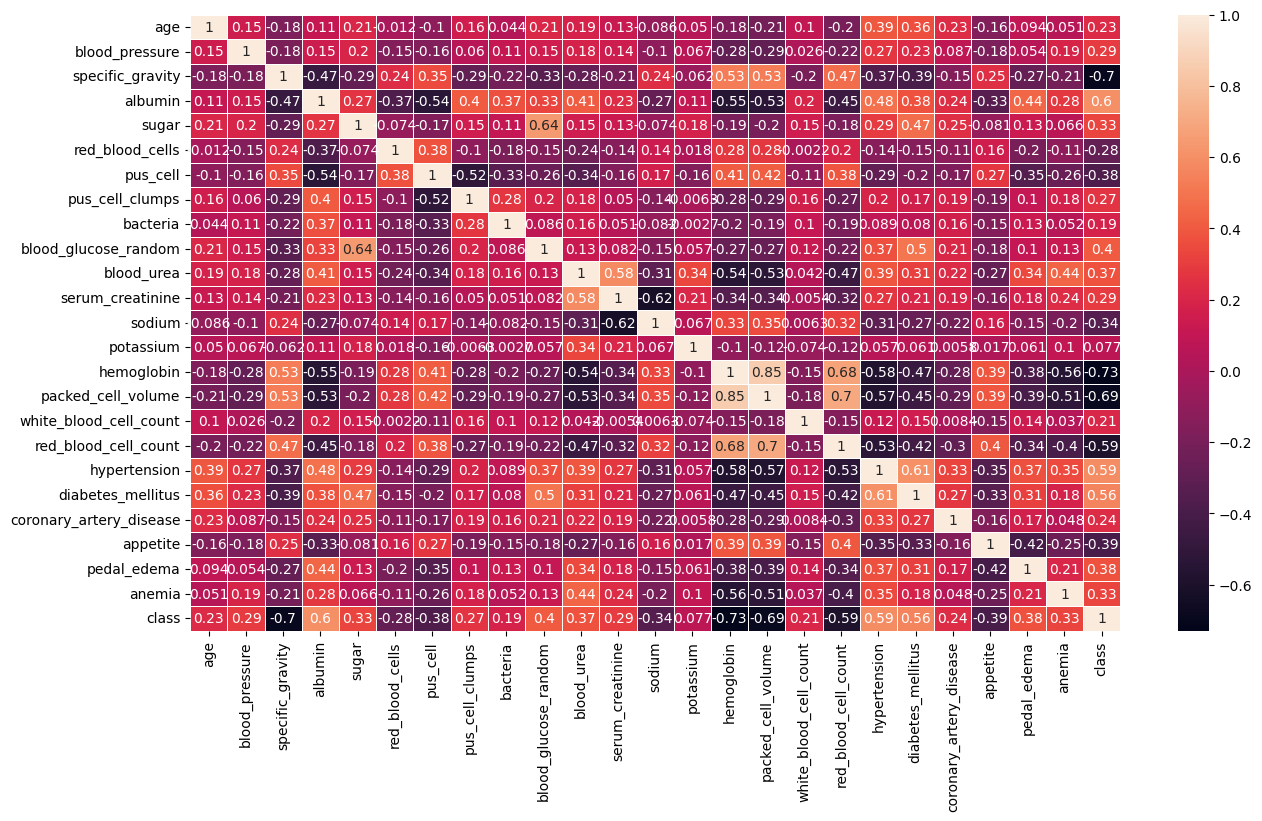

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(),annot=True,linewidths=0.5)
plt.show()

In [71]:
target_corr =df_data.corr()['class'].abs().sort_values(ascending=False)[1:]
target_corr

hemoglobin                 0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
pedal_edema                0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [72]:
df_data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x=df_data.drop("class",axis=1)
y=df_data["class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
print(f"'x' shape:{x_train.shape}")
print(f"'X_test' shape:{x_test.shape}")

'x' shape:(300, 24)
'X_test' shape:(100, 24)


In [75]:
from sklearn.tree import DecisionTreeClassifier
dct =DecisionTreeClassifier()
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pred_dct=dct.predict(x_test)
y_pred_dct

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [80]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC(kernel='linear')))  # Corrected 'kernel' argument

# Continue with the rest of your code...


In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [82]:
for name, model in models:
    print(name,model)
    print()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy:",accuracy_score(y_test,y_pred))
    print('\n')    
    print("precision:",precision_score(y_test,y_pred))
    print('\n')
    print("recall:",recall_score(y_test,y_pred))
    print('\n')
    print("f1_score:",f1_score(y_test,y_pred))
    print('\n')

Naive Bayes GaussianNB()

[[37  0]
 [ 5 58]]


accuracy: 0.95


precision: 1.0


recall: 0.9206349206349206


f1_score: 0.9586776859504132


KNN KNeighborsClassifier(n_neighbors=8)

[[31  6]
 [18 45]]


accuracy: 0.76


precision: 0.8823529411764706


recall: 0.7142857142857143


f1_score: 0.7894736842105263


Random Forest RandomForestClassifier()

[[35  2]
 [ 0 63]]


accuracy: 0.98


precision: 0.9692307692307692


recall: 1.0


f1_score: 0.984375


Decision Tree DecisionTreeClassifier()

[[35  2]
 [ 2 61]]


accuracy: 0.96


precision: 0.9682539682539683


recall: 0.9682539682539683


f1_score: 0.9682539682539683


SVM SVC(kernel='linear')

[[34  3]
 [ 2 61]]


accuracy: 0.95


precision: 0.953125


recall: 0.9682539682539683


f1_score: 0.9606299212598425


